<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 22 столбца. Типы данных в столбцах: float64 - 14, int64 - 3, object - 3, bool - 2.

Есть замечание по стилистике заголовка столбца `cityCenters_nearest`: написан в смешанном регистре (приведём к "змеиному"), прописная буква в заголовке. 

### Вывод

Таблица описывает объявления о продаже квартиры в Санкт-Петербурге и ближайших населённых пунктах за несколько лет. Часть данных вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

В данных встречается довольно много пропусков. Часть пропусков, вероятно, связана с тем, что продавцы не вносили изначально какую-либо информацию в объявление (либо потому что этот признак отсутствовал, либо за неимением информации) - они носят неслучайный характер. Эти пропуски попробуем заполнить логически или на основе имеющихся коррелирующих данных. Часть пропусков, возможно, объясняется техническими причинами, т.к. есть информация, которая выгружается автоматически на основе картографических данных. В этом случае необходимо обратиться к разработчикам.




## Предобработка данных

Приводим заголовок к единому виду.

In [114]:
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'})

In [115]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

При рассмотрении столбца `rooms` обнаружились квартиры с 0 комнат. 

In [116]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Посмотрим принадлежат ли квартиры-студии и квартиры с открытой планировкой к их числу.

In [117]:
df_rooms_filtered = data[(data['rooms'] == 0)] 
len(df_rooms_filtered[(df_rooms_filtered['studio'] == True) | (df_rooms_filtered['open_plan'] == True)])

197

Версия подтвердилась. Это оказались квартиры-студии и квартиры с открытой планировкой. Значение менять не будем. Это будет маркером таких квартир.
    

Чтобы заполнить пропуски в столбце `living_area` и `kitchen_area` будем отталкиваться от общей площади квартир. Чем больше площадь квартиры, тем больше жилая площадь и т.д. Посмотрим коэффициент корреляции, чтобы проверить это предположение.

In [118]:
data[['total_area', 'living_area', 'kitchen_area']].corr()

,total_area,living_area,kitchen_area
total_area,1.0,0.9,0.6
living_area,0.9,1.0,0.4
kitchen_area,0.6,0.4,1.0


Из таблицы видно, что между общей площадью и жилой есть сильная взаимосвязь. С кухней не такая большая взаимосвязь, но всё же выше среднего. Так что применить для заполнения этих пропусков один и тот же способ будет приемлемо.  

Пропуски в столбце `kitchen_area` заполним медианным значением исходя из соответствия недвижимости к категории по общей площади.
Для этого сначала делаем категоризацию по общей площади.

In [119]:
data['total_area_ctg'] = pd.qcut(data['total_area'], q=10, labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_ctg
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN,9
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0,2
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0,5
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0,9
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0,9


In [120]:
kitchen_area_grouped = data.groupby('total_area_ctg')['kitchen_area'].median()
display(kitchen_area_grouped)

total_area_ctg
0    6.2
1    9.0
2   10.0
3    7.0
4    8.0
5    8.5
6    9.2
7   10.0
8   12.0
9   16.0
Name: kitchen_area, dtype: float64

In [121]:
def func(row):
    if pd.isna(row['kitchen_area']):
            return kitchen_area_grouped.loc[row['total_area_ctg']] 
    return row['kitchen_area']   

data['kitchen_area'] = data.apply(func, axis=1)

Также заполняем пропуски в столбце `living_area`.

In [122]:
living_area_grouped = data.groupby('total_area_ctg')['living_area'].median()
display(living_area_grouped)

total_area_ctg
0   17.0
1   17.1
2   18.6
3   27.3
4   29.2
5   32.0
6   37.4
7   42.3
8   48.8
9   69.0
Name: living_area, dtype: float64

In [123]:
def func2(row):
    if pd.isna(row['living_area']):
            return living_area_grouped.loc[row['total_area_ctg']] 
    return row['living_area']   

data['living_area'] = data.apply(func2, axis=1)

При заполнении пропусков этажности зданий не стал прибегать к среднему и медианному значениям, так как в столбце `floor` присутствует много значений, которые их превосходят. 

В дальнейшем, будем делать категоризацию по этажу квартиры. Очевидно, что самая многочисленная группа будет "Другой". Чтобы пропуски не оказали влияния поместим их в группу "Другой", прибавив к этажности квартиры + 1.

In [124]:
df = data.loc[data['floors_total'].isna()]
df['floor'].value_counts()

4     10
6      9
8      8
12     6
9      5
3      4
5      4
7      4
21     4
15     3
19     3
18     3
1      3
13     3
11     3
10     3
14     2
2      2
20     2
24     2
17     1
22     1
23     1
Name: floor, dtype: int64

In [125]:
data['floors_total'].mean()

10.67382374115953

In [126]:
data['floors_total'].median()

9.0

In [127]:
def floors_total(row):
    if pd.isna(row['floors_total']):
        result = row['floor'] + 1
        return result
    return row['floors_total']

data['floors_total'] = data.apply(floors_total, axis=1)

Пропуски в столбце `ceiling_height` заполняем медианным значением исходя из этажности здания нахождения квартиры.

In [128]:
def floors_total_ctg(floors):
    if floors == 1:
        return 'частный дом'
    if floors <= 5:
        return 'хрущёвка'
    if 5 < floors <= 9:
        return 'брежневка'
    return 'новостройка'

data['floors_total_ctg'] = data['floors_total'].apply(floors_total_ctg)

ceiling_median = data.groupby('floors_total_ctg')['ceiling_height'].median()

def ceiling(row):
    if pd.isna(row['ceiling_height']):
        return ceiling_median.loc[row['floors_total_ctg']]
    return row['ceiling_height']

data['ceiling_height'] = data.apply(ceiling, axis=1)

Пропуски в столбце `balcony` заменим на 0, так как если продавец не указал информацию о нём, вероятно его нет.

In [129]:
data['balcony'] = data['balcony'].fillna(0) 

Также как и с балконами, если покупатель не указал, что квартира не является апартаментами, мы можем предположить, что так оно и есть.

In [130]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Пропуски в названии населенных пунктов, расстоянии до центра, аэропорта и т.д. заполнять не будем. 

Во-первых, если заполнять их средними или другими значениями, может получиться картина далёкая от истины.

Во-вторых, эти данные должны были выгрузиться автоматически на основе картографических данных и следует об этих пропусках известить разработчиков.

В-третьих, эти данные не будут участвовать в исследовании.

Пропуски в `days_exposition` также не будем заполнять. Вероятно, это те объявления, которые на момент выгрузки данных были активны. Заполнение этих данных исказит расчёт скорости продажи квартиры.

In [131]:
data.duplicated().sum()

0

Дубликаты не обнаружены.

In [132]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
total_area_ctg              0
floors_total_ctg            0
dtype: int64

**Изменение типов данных**

Изменим тип данных в столбце `first_day_exposition` для облегчения дальнейшего с ним взаимодействия.

In [133]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y.%m.%d')

In [134]:
columns = ['last_price', 'total_area', 'floors_total'] 
for column in columns:
    data[column] = data[column].astype('int')

### Вывод

Предобработка обнаружила 2 проблемы в данных:
- нарушения в стиле заголовков,
- пропущенные значения.
    
Мы исправили заголовки, чтобы упростить работу с таблицей.

Заполнили пропущенные значения. 

Теперь можно перейти к исследованию. 

## Расчёты и добавление результатов в таблицу

**Добавляем в таблицу столбец `Цена за квадратный метр`**  

In [135]:
data['price_per_sq_meter'] = data['last_price'] / data['total_area']

**Добавляем день недели, месяц и год публикации объявления**

In [136]:
data['day_of_week_expo'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_expo'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_expo'] = pd.DatetimeIndex(data['first_day_exposition']).year

**Добавляем категоризацию по этажу квартиры**

In [137]:
def floor_group(row):
    if row['floor'] == 1:
        return '1 этаж'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'
data['floor_category'] = data.apply(floor_group, axis=1) 

**Добавляем столбцы соотношений жилой площади и кухни к общей площади**

In [138]:
data['ratio_living_total'] = data['living_area'] / data['total_area'] * 100
data['ratio_kitchen_total'] = data['kitchen_area'] / data['total_area'] * 100
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_area_ctg,floors_total_ctg,price_per_sq_meter,day_of_week_expo,month_expo,year_expo,floor_category,ratio_living_total,ratio_kitchen_total
0,20,13000000,108,2019-03-07,3,2.7,16,51.0,8,False,...,NaN,9,новостройка,"120,370.4",3,3,2019,Другой,47.2,23.1
1,7,3350000,40,2018-12-04,1,2.7,11,18.6,1,False,...,81.0,2,новостройка,"83,750.0",1,12,2018,1 этаж,46.5,27.5
2,10,5196000,56,2015-08-20,2,2.6,5,34.3,4,False,...,558.0,5,хрущёвка,"92,785.7",3,8,2015,Другой,61.2,14.8
3,0,64900000,159,2015-07-24,3,2.7,14,69.0,9,False,...,424.0,9,новостройка,"408,176.1",4,7,2015,Другой,43.4,10.1
4,2,10000000,100,2018-06-19,2,3.0,14,32.0,13,False,...,121.0,9,новостройка,"100,000.0",1,6,2018,Другой,32.0,41.0


## Исследовательский анализ данных

**Изучаем следующие параметры: площадь, цена, число комнат, высота потолков** 

Приведём данные в таблице в более понятный вид, особенно актуально для цены где большие числа. Это поможет нам в определении диапазонов при построении гистограмм.

In [139]:
pd.options.display.float_format = '{:,.1f}'.format
data.describe()                     

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,day_of_week_expo,month_expo,year_expo,ratio_living_total,ratio_kitchen_total
count,"23,699.0","23,699.0","23,699.0","23,699.0","23,699.0","23,699.0","23,699.0","23,699.0","23,699.0","23,699.0",...,"8,079.0","18,181.0","9,110.0","20,518.0","23,699.0","23,699.0","23,699.0","23,699.0","23,699.0","23,699.0"
mean,9.9,"6,541,548.8",60.1,2.1,2.7,10.7,34.5,5.9,10.4,0.6,...,490.8,0.8,518.0,180.9,"99,874.1",2.6,6.4,"2,017.4",56.8,18.8
std,5.7,"10,887,013.3",35.7,1.1,1.0,6.6,21.6,4.9,5.7,1.0,...,342.3,0.9,277.7,219.7,"50,418.4",1.8,3.5,1.0,10.4,7.2
min,0.0,"12,190.0",12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,...,1.0,0.0,13.0,1.0,111.8,0.0,1.0,"2,014.0",2.2,2.5
25%,6.0,"3,400,000.0",40.0,1.0,2.6,5.0,18.6,2.0,7.0,0.0,...,288.0,0.0,294.0,45.0,"76,985.5",1.0,3.0,"2,017.0",50.0,13.6
50%,9.0,"4,650,000.0",52.0,2.0,2.6,9.0,30.0,4.0,9.0,0.0,...,455.0,1.0,502.0,95.0,"95,454.5",3.0,6.0,"2,017.0",57.3,17.1
75%,14.0,"6,800,000.0",69.0,3.0,2.7,16.0,42.3,8.0,11.9,1.0,...,612.0,1.0,729.0,232.0,"114,864.9",4.0,10.0,"2,018.0",63.7,23.4
max,50.0,"763,000,000.0",900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,...,"3,190.0",3.0,"1,344.0","1,580.0","1,907,500.0",6.0,12.0,"2,019.0",130.8,78.8


Строим гистограммы для каждого параметра.

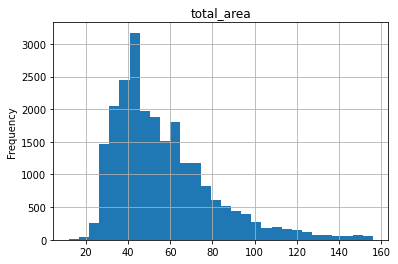

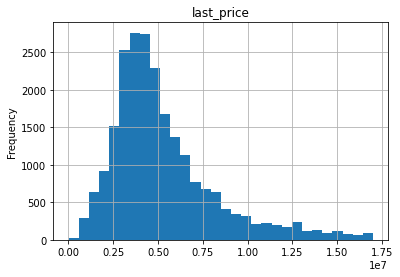

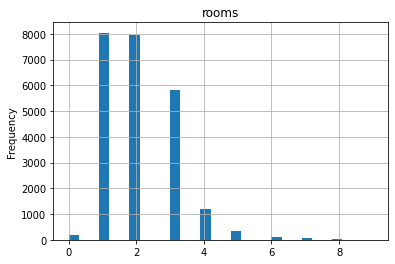

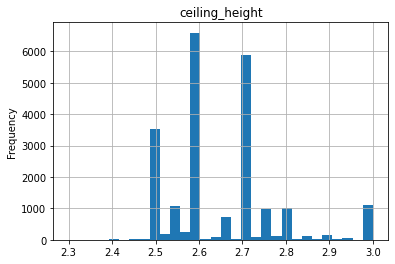

In [140]:
def subset_by_iqr(df, column, whisker_width=3):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]
    
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    df = subset_by_iqr(data , column, whisker_width=3)
    df[column].plot(title=column, kind='hist', bins=30, grid=True)
    plt.show()

In [141]:
mean_median = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for column in mean_median:
    print(data[column].agg(['mean', 'median']))
    print()     

mean     60.1
median   52.0
Name: total_area, dtype: float64

mean     6,541,548.8
median   4,650,000.0
Name: last_price, dtype: float64

mean     2.1
median   2.0
Name: rooms, dtype: float64

mean     2.7
median   2.6
Name: ceiling_height, dtype: float64



При построении гистограмм видно:
- самый массовый сегмент - квартиры около 50 кв м
- большая часть квартир стоит 5 млн. руб.
- большая часть объявлений - одно- и двухкомнатные квартиры, реже трёхкомнатные
- самая распространённая высота потолков составляет 2,7 - 2,8 м

Графики выглядят правдоподобно. На некоторых графиках видны аномалии - оторванные от общего графика значения, как в большую, так и в меньшую сторону. Например, видны квартиры с площадью гораздо больше 200 кв м, также есть очень дорогие квартиры, квартиры с потолками 2 м и более 3,5 м.



**Изучаем время продажи квартиры**

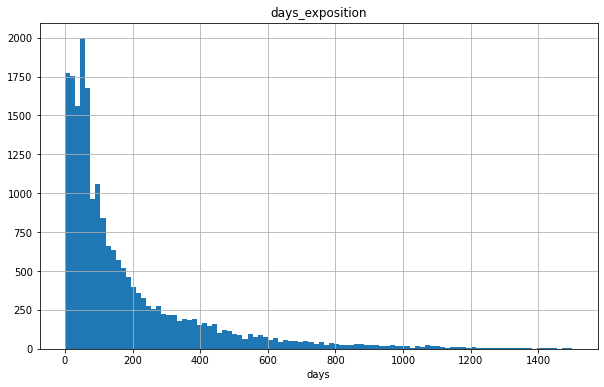

In [142]:
data['days_exposition'].hist(bins=100, range=(0, 1500), figsize=(10,6))
plt.xlabel('days')
plt.title('days_exposition')
plt.show()

Среднее и медианное время продажи квартиры

In [143]:
data['days_exposition'].agg(['mean', 'median'])

mean     180.9
median    95.0
Name: days_exposition, dtype: float64

Между медианным и средним значением разница в три месяца. Объясняется это "выбросами", которые влияют на среднее значение в большую сторону.

Судя по гистограмме, обычная продажа занимает три-три с половиной месяца. 

Быстрой можно считать продажу, которая прошла в течение месяца после размещения объявления.

Необычно долгими выглядят продажи от 1200 дней и более.

**Убираем редкие и выбивающиеся значения**

Чтобы определить выбросы воспользуемся диаграммой размаха.

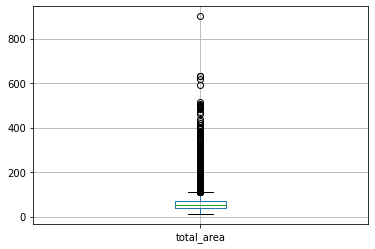

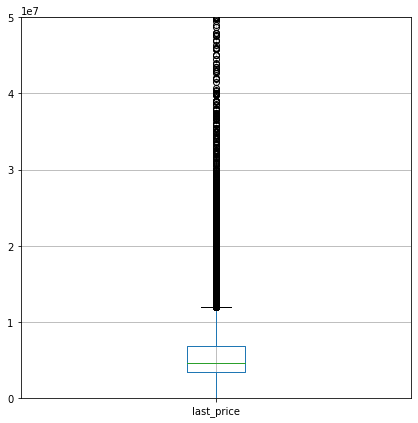

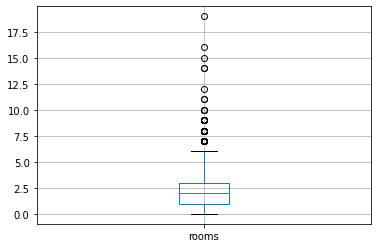

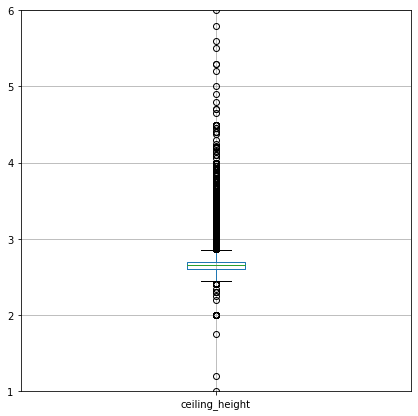

In [144]:
data.boxplot(column='total_area')
plt.show()
ax = data.boxplot(column='last_price', figsize=(7,7))
ax.set_ylim(0,50000000)
plt.show()
data.boxplot(column='rooms')
plt.show()
bx = data.boxplot(column='ceiling_height', figsize=(7,7))
bx.set_ylim(1,6)
plt.show()

На основе данных диаграмм размаха фильтруем датафрейм.

In [145]:
data_filtered = data[(15 <= data['total_area']) &
                     (data['total_area'] <= 100) &
                     (data['last_price'] <= 12000000) &
                     (data['rooms'] <= 6) &
                     (2.5 <= data['ceiling_height']) &
                     (data['ceiling_height'] <= 2.8)
                      ] 

In [146]:
print((data_filtered.shape[0]/data.shape[0] - 1) * 100)
data.shape[0] - data_filtered.shape[0]

-18.713869783535173


4435

Отфильтрованные "выбросы" по рассматриваемым параметрам составили 18,71% или 4435 строк.

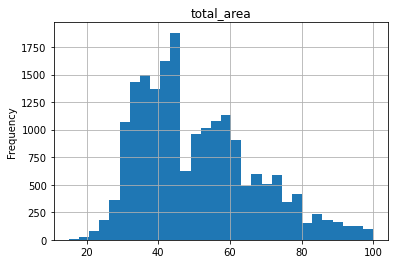

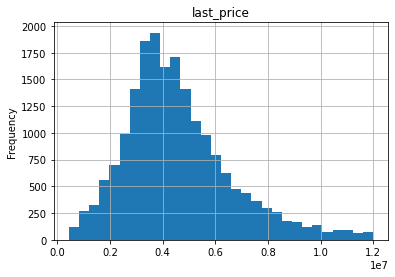

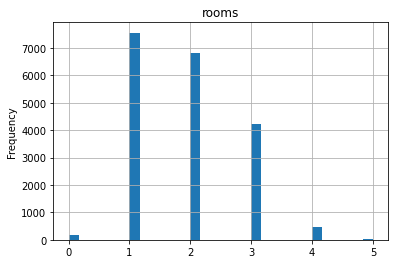

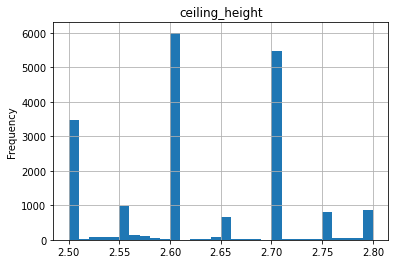

In [147]:
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    df = subset_by_iqr(data_filtered , column, whisker_width=3)
    df[column].plot(title=column, kind='hist', bins=30, grid=True)
    plt.show()

In [148]:
for column in mean_median:
    print(data_filtered[column].agg(['mean', 'median']))
    print()     

mean     50.7
median   47.0
Name: total_area, dtype: float64

mean     4,583,760.6
median   4,220,000.0
Name: last_price, dtype: float64

mean     1.9
median   2.0
Name: rooms, dtype: float64

mean     2.6
median   2.6
Name: ceiling_height, dtype: float64



Графики стали менее плавными. Средние значения приблизились к медианным.

**Рассматриваем факторы, влиящие на стоимость квартиры**

Рассматриваем зависимость цены от площади, числа комнат, удалённости от центра.

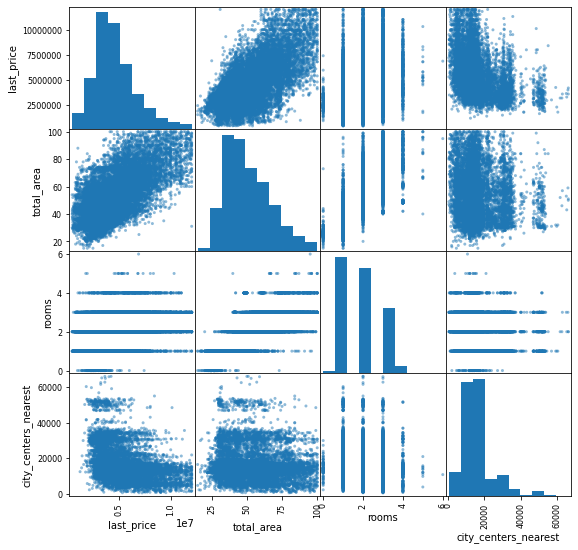

In [149]:
df_s_rooms_center = data_filtered[['last_price', 'total_area', 'rooms', 'city_centers_nearest']]
pd.plotting.scatter_matrix(df_s_rooms_center, figsize=(9,9))
plt.show()

In [150]:
df_s_rooms_center.corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.0,0.7,0.4,-0.3
total_area,0.7,1.0,0.8,-0.1
rooms,0.4,0.8,1.0,-0.0
city_centers_nearest,-0.3,-0.1,-0.0,1.0


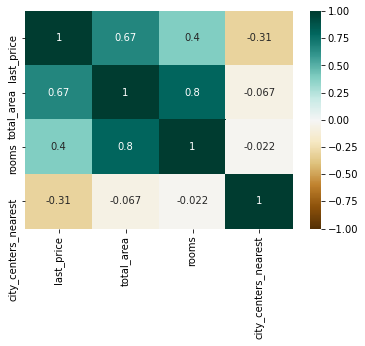

In [151]:
sns.heatmap(df_s_rooms_center.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

Коэффициент корреляции (0,7) показывает взаимосвязь цены от площади . Вид точечной диаграммы подтверждает этот вывод. Количество комнат и расстояние до центра показывают слабую взаимосвязь с ценой (0,4 и -0,3).

Рассматриваем зависимость цены от этажа нахождения квартиры.

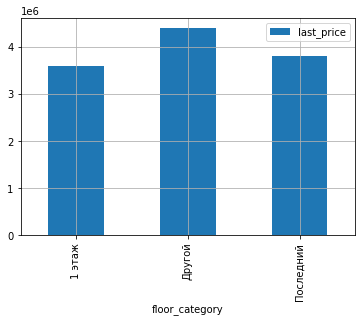

In [152]:
data_filtered.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', grid=True)
plt.show()

Квартиры на первом этаже самые дешёвые - 3,6 млн руб. Самые дорогие - в категории "Другой", будут почти на 1 миллион дороже.

Рассматриваем зависимость цены от даты размещения: дня недели, месяца и года.

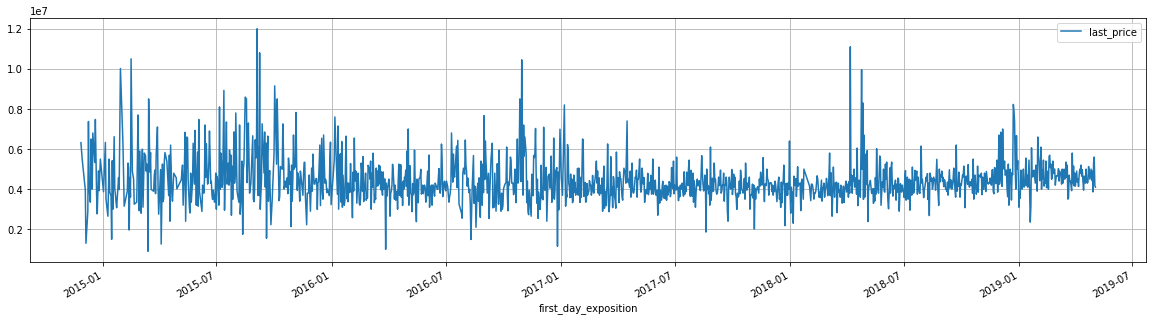

In [153]:
data_filtered.pivot_table(index='first_day_exposition', values='last_price', aggfunc='median').plot(grid=True, figsize=(20, 5))
plt.show()

Сложно сделать однозначный вывод.

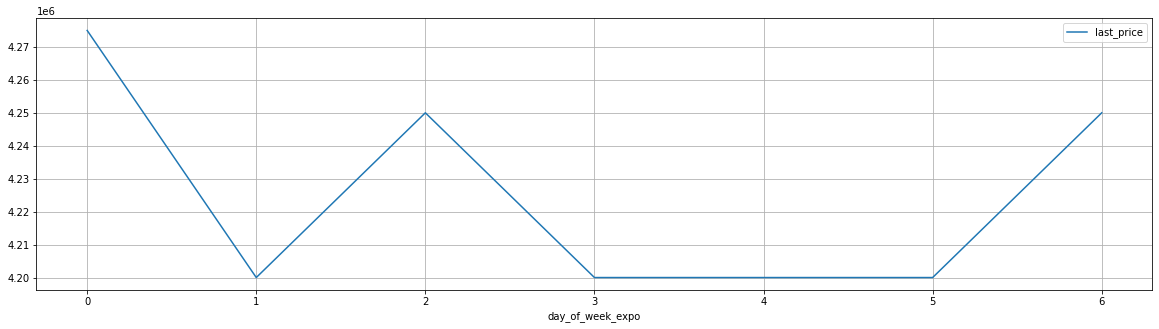

In [154]:
data_filtered.pivot_table(index='day_of_week_expo', values='last_price', aggfunc='median').plot(grid=True, figsize=(20, 5))
plt.show()

В понедельник размещались объявления с самыми высокими ценами - 4,27 млн руб. Во вторник, четверг, пятницу и субботу были самые низкие цены - 4,2 млн руб.

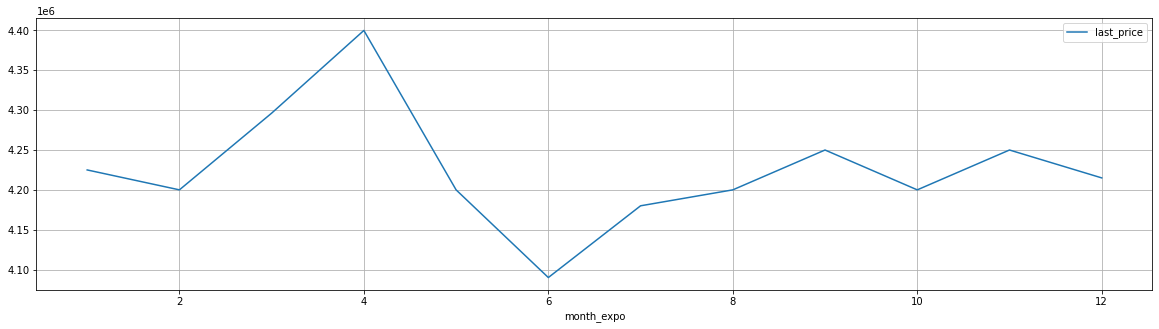

In [155]:
data_filtered.pivot_table(index='month_expo', values='last_price', aggfunc='median').plot(grid=True, figsize=(20, 5))
plt.show()

Наблюдается рост цены с февраля по апрель - до 4,4 млн руб., затем больщое снижение до июня - до 4,1 млн руб. В остальное время колебания незначительные на уровне 4,2 млн руб.

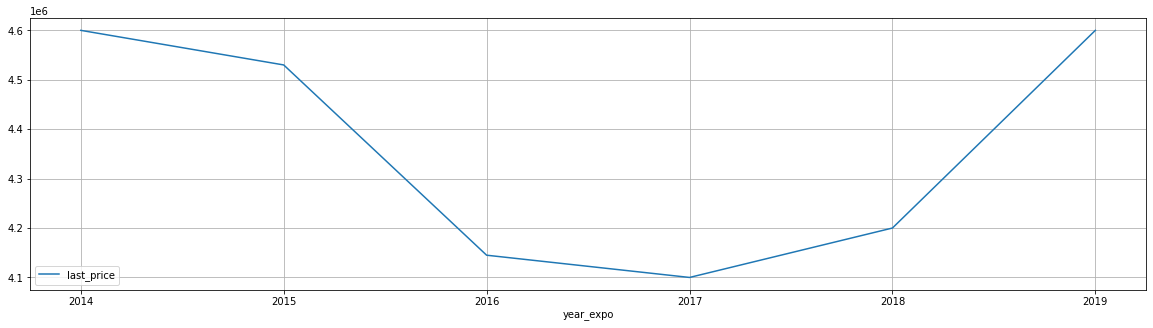

In [156]:
data_filtered.pivot_table(index='year_expo', values='last_price', aggfunc='median').plot(grid=True, figsize=(20, 5))
plt.show()

В течение 2015 года значительное снижение медианной цены с 4,53 млн руб. до 4,15 млн руб. В 2016 году снижение продолжилось до уровня 4,1 млн руб - самая низкая отметка. С 2018 года начался значительный рост.

**Определяем населённые пункты с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью жилья**

In [157]:
data_filtered.groupby('locality_name')['price_per_sq_meter'].agg(['mean', 'count']).sort_values(by='count',ascending=False).head(10)

,mean,count
locality_name,,
Санкт-Петербург,"105,409.8",11850
посёлок Мурино,"86,225.6",512
посёлок Шушары,"79,078.3",428
Всеволожск,"67,383.9",378
посёлок Парголово,"90,984.3",321
Колпино,"75,783.9",314
Пушкин,"100,090.8",297
деревня Кудрово,"93,033.8",294
Гатчина,"68,603.2",281


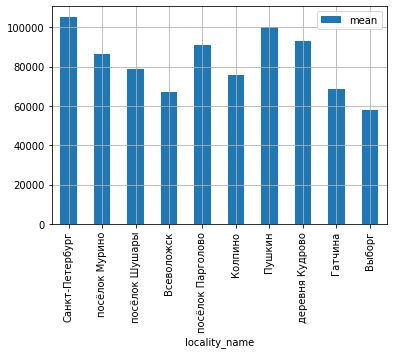

In [158]:
data_filtered.groupby('locality_name')['price_per_sq_meter'].agg(['mean', 'count']).sort_values(by='count',ascending=False).head(10).plot(y='mean', kind='bar', grid=True)
plt.show()

Самая высокая стоимость жилья в Санкт-Петербурге и Пушкине - 105409,8 руб. и 100090,8 руб. за кв м соответственно.

Самая низкая стоимость жилья в Выборге - 57765,5 руб.

**Определяем центральную часть города Санкт-Петербург**

In [159]:
spb = data_filtered.query('locality_name == "Санкт-Петербург"')
spb['city_centers_nearest'].isna().sum()

32

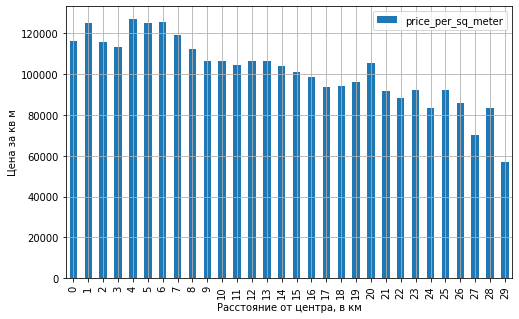

In [160]:
spb = spb.dropna(subset=['city_centers_nearest'])
spb['to_center_km'] = spb['city_centers_nearest'] / 1000
spb['to_center_km'] = spb['to_center_km'].astype('int')
spb.pivot_table(index='to_center_km', values='price_per_sq_meter').plot(y='price_per_sq_meter', kind='bar', grid=True, figsize=(8,5))
plt.xlabel('Расстояние от центра, в км')
plt.ylabel('Цена за кв м')
plt.show()

Судя по графику, видно, что цены в зоне 0-8 км выше, чем в остальной части города. Это и есть центральная часть.

**Изучаем квартиры в центре**

Построим диаграмму рассеяния для выявления параметров, влиящих на цену. Возьмём следующие параметры: площадь, число комнат, высота потолков.

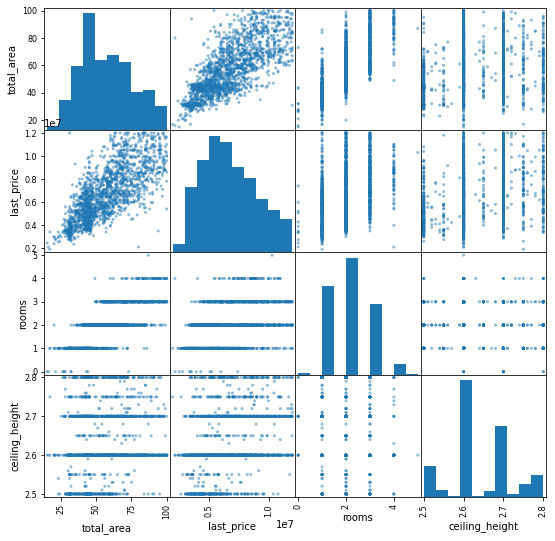

In [161]:
spb_filtered = spb.query('to_center_km <= 8')
pd.plotting.scatter_matrix(spb_filtered[['total_area', 'last_price', 'rooms',  'ceiling_height']], figsize=(9,9))
plt.show()

In [162]:
spb_filtered[['total_area', 'last_price', 'rooms',  'ceiling_height']].corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.0,0.7,0.8,0.1
last_price,0.7,1.0,0.4,0.3
rooms,0.8,0.4,1.0,-0.1
ceiling_height,0.1,0.3,-0.1,1.0


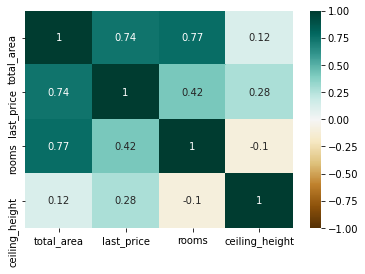

In [163]:
sns.heatmap(spb_filtered[['total_area', 'last_price', 'rooms',  'ceiling_height']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

В центральной зоне как и повсеместно видна взаимосвязь цены от общей площади. Количество комнат и высота потолков не сильно влияют на цену. 

In [164]:
for column in ['total_area', 'last_price', 'rooms',  'ceiling_height']:
    print(spb_filtered[column].agg(['mean', 'median']))
    print()     

mean     57.2
median   55.0
Name: total_area, dtype: float64

mean     6,737,565.3
median   6,500,000.0
Name: last_price, dtype: float64

mean     2.0
median   2.0
Name: rooms, dtype: float64

mean     2.6
median   2.6
Name: ceiling_height, dtype: float64



Теперь рассмотрим число комнат, этаж, удалённость от центра.

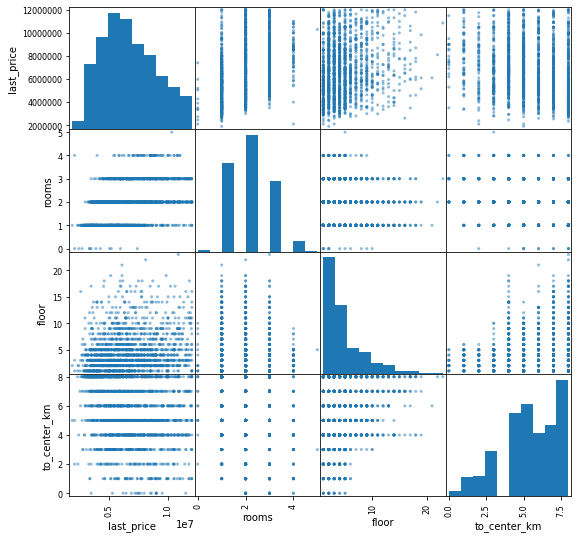

In [165]:
pd.plotting.scatter_matrix(spb_filtered[['last_price', 'rooms', 'floor', 'to_center_km']], figsize=(9,9))
plt.show()

In [166]:
spb_filtered[['last_price', 'rooms', 'floor', 'to_center_km']].corr()

,last_price,rooms,floor,to_center_km
last_price,1.0,0.4,0.2,-0.2
rooms,0.4,1.0,-0.1,-0.2
floor,0.2,-0.1,1.0,0.2
to_center_km,-0.2,-0.2,0.2,1.0


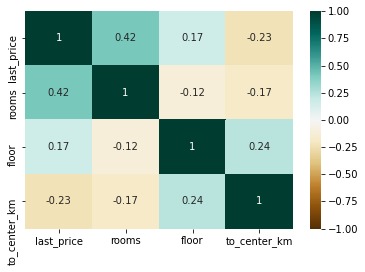

In [167]:
sns.heatmap(spb_filtered[['last_price', 'rooms', 'floor', 'to_center_km']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

В центральной зоне не прослеживается взаимосвязи цены от количества комнат, этажа и даже близости к центру.

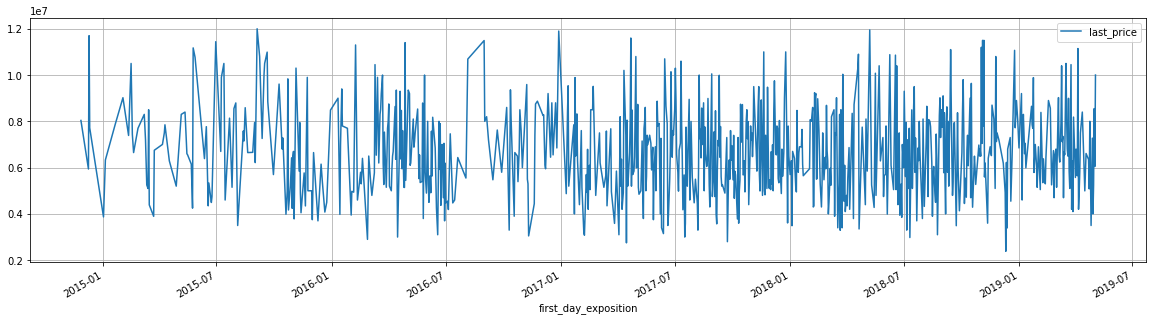

In [168]:
spb_filtered.pivot_table(index='first_day_exposition', values='last_price', aggfunc='median').plot(grid=True, figsize=(20,5))
plt.show()

Заметна разница в колебаниях цен. До 2017 года частота колебаний ниже. Практически каждый год видны падения цены в июне-июле.

Сравним эти же параметры с данными по всему городу.

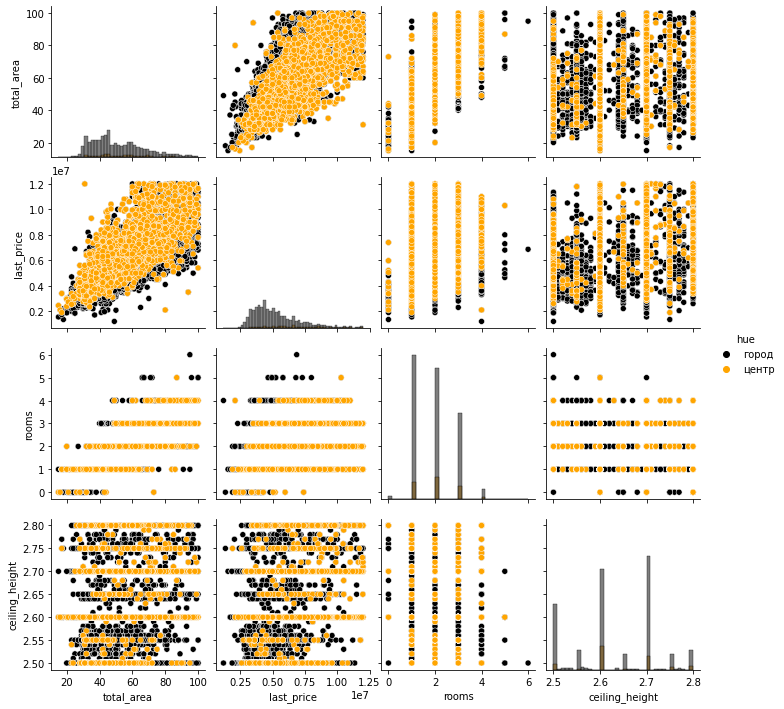

In [169]:
sc1 = spb_filtered[['total_area', 'last_price', 'rooms',  'ceiling_height']]
sc2 = spb[['total_area', 'last_price', 'rooms',  'ceiling_height']]
sns.pairplot(pd.concat([sc2.assign(hue='город'), 
                        sc1.assign(hue='центр')]), 
             hue='hue', 
             diag_kind='hist', 
             palette=['k', 'orange'])
plt.show()

In [170]:
spb[['total_area', 'last_price', 'rooms',  'ceiling_height']].corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.0,0.8,0.8,0.1
last_price,0.8,1.0,0.5,0.3
rooms,0.8,0.5,1.0,-0.2
ceiling_height,0.1,0.3,-0.2,1.0


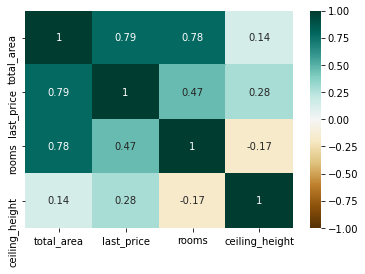

In [171]:
sns.heatmap(spb[['total_area', 'last_price', 'rooms',  'ceiling_height']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

In [172]:
for column in ['total_area', 'last_price', 'rooms',  'ceiling_height']:
    print(spb[column].agg(['mean', 'median']))
    print()     

mean     51.7
median   48.0
Name: total_area, dtype: float64

mean     5,375,370.9
median   4,900,000.0
Name: last_price, dtype: float64

mean     1.9
median   2.0
Name: rooms, dtype: float64

mean     2.6
median   2.6
Name: ceiling_height, dtype: float64



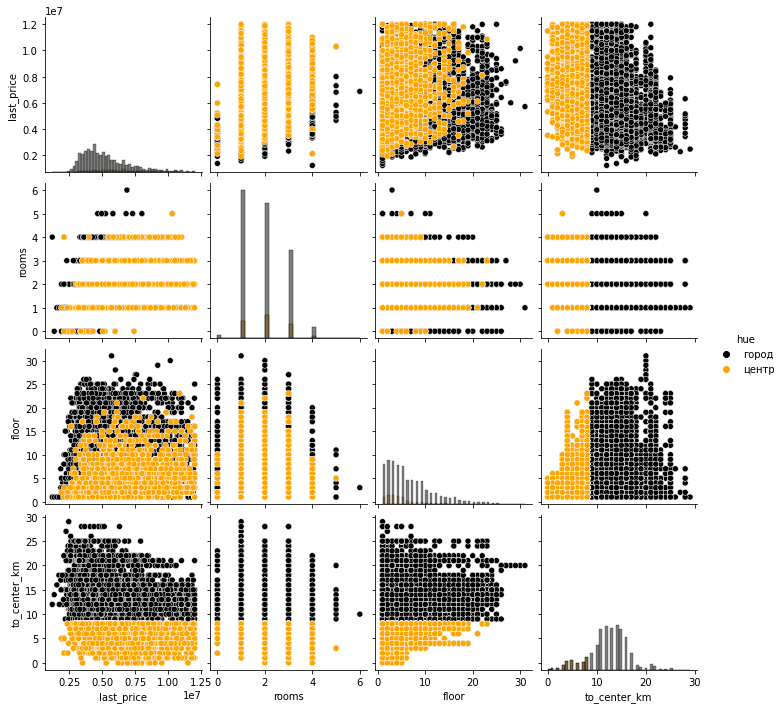

In [173]:
sc1 = spb_filtered[['last_price', 'rooms', 'floor', 'to_center_km']]
sc2 = spb[['last_price', 'rooms', 'floor', 'to_center_km']]
sns.pairplot(pd.concat([sc2.assign(hue='город'), 
                        sc1.assign(hue='центр')]), 
             hue='hue', 
             diag_kind='hist', 
             palette=['k', 'orange'])
plt.show()

In [174]:
spb[['last_price', 'rooms', 'floor', 'to_center_km']].corr()

,last_price,rooms,floor,to_center_km
last_price,1.0,0.5,0.1,-0.3
rooms,0.5,1.0,-0.2,-0.1
floor,0.1,-0.2,1.0,0.2
to_center_km,-0.3,-0.1,0.2,1.0


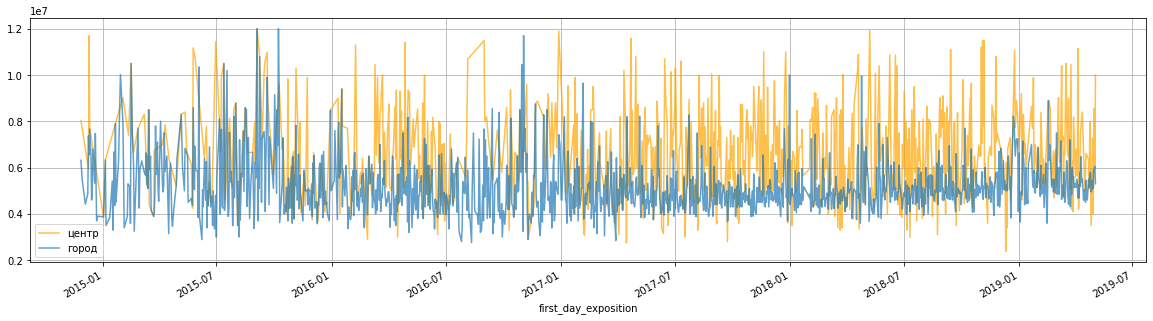

In [175]:
ax = spb_filtered.pivot_table(index='first_day_exposition', values='last_price', aggfunc='median').plot(y='last_price', alpha=0.7, c='orange', label='центр', figsize=(20,5))
spb.pivot_table(index='first_day_exposition', values='last_price', aggfunc='median').plot(y='last_price', alpha=0.7, label='город', ax=ax, grid=True, figsize=(20,5))
plt.show()

На графике по всему городу после 2017 года резких колебаний становится меньше.

Если сравнивать центральную часть города с общими выводами по всему городу, то можно выделить общую черту - взаимосвязь цены от общей площади. Остальные параметры не показали взаимосвязи. Также влияет на конечную цену стоимость за 1 кв м, но эту взаимосвязь можно увидеть лишь сравнивая квартиры по параметру удалённости от центра. Квартиры, продаваемые в центральной зоне, больше по площади, чем по всему городу. Вместе с более высокой ценой за кв м это даёт разницу в 1,5 млн руб по сравнению со стоимостью квартир в целом по городу (6,5 млн руб. - в центре, против 4,9 млн руб. - по городу).

## Общий вывод

В процессе выполнения работы было сделано следующее:
- ознакомились с полученными данными на предмет соответствия, стоящей перед нами задачей,
- где это было возможно и целесообразно вставили пропущенные значения,
- посчитаны и добавлены в таблицу, необходимые в дальнейшем: цена за кв м, разбивка даты публикации объявления на день, месяц, год, категоризация по этажу квартиры,
- изучено влияние на итоговую цену таких параметров, как: площадь,число комнат, высота потолков, цена за кв м, этажа, удалённости от центра,
- изучили сроки продажи квартиры,
- убрали редкие и выбивающиеся значения,
- определили населённые пункты с наибольшим числом объявлений, посчитали в них цену за кв м,
- определили в Санкт-Петербурге центральную часть города,
- проанализировали параметры квартир центральной части города, сравнили их с данными по всему городу. 


В ходе изучения данных установили:

- обычное время продажи квартиры - 3 месяца,
- самые низкие цены у квартир на первом этаже,
- наибольшее влияние на цену оказывает общая площадь квартиры,
- также на итоговую цену влияет стоимость 1 кв м, 
- чем ближе к центру, тем цена за кв м выше,
- также стоимость кв м зависит от населённого пункта: в Санкт-Петербурге и Пушкине самая высокая цена (105409,8 руб. и 100090,8 руб. соответственно), в Выборге самая низкая (57765,5 руб),
- период низких цен прошёл, наблюдается тенденция на рост цен,
- самые высокие цены в течение года в апреле - 4,4 млн руб., самые низкие в июне - 4,1 млн руб.,
- в основном продаются 1-, 2-комнатные квартиры площадью ~50 кв м с потолками 2,6 м

    

